   # Loan Prediction  Using Supervised Machine Learning- Classification

   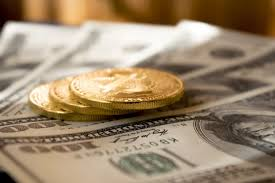

# 1) Problem Statement:-
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

**Company wants to automate the loan eligibility process (real time) based on customer detail** provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# 2) Installing and importing packages

In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                    # Importing for data analysis
#------------------------------------------------------------------------------------------------------------------------------
import seaborn as sns                                                  # Importing for data visualization
import matplotlib.pyplot as plt 
import plotly.express as ex                                            # Importing Plotly Express for Dynamic Plotting
import plotly.graph_objs as go                                         # Importing Plotly graphs for Dynamic Plotting
#------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                     # Importing numpy package(for Numberical Python )
#------------------------------------------------------------------------------------------------------------------------------
import warnings                                                        #Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                      # Warnings will appear only once
#------------------------------------------------------------------------------------------------------------------------------
from sklearn import preprocessing                                      # Calling preprocessing for preprocessing of data
from sklearn.preprocessing import StandardScaler                       # Calling standardscaler for standerdization
from sklearn.preprocessing import MinMaxScaler,LabelEncoder            # Calling MinMaxScaler,LabelEncoder for Encoder
#------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                            # Calling the metrics for calculating performence metrics
from sklearn.metrics import accuracy_score                            # Importing accuracy_score
#-----------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                   # Calling train_test_split for splitinng the dataset 
from sklearn.model_selection import RandomizedSearchCV                 # Calling RandomizedSearchCV for tuning the model
from sklearn.model_selection import cross_val_score                    # Importing cross_val_score  
from sklearn.model_selection import GridSearchCV                       # Importing GridsearchCV
#-----------------------------------------------------------------------------------------------------------------------------

# 3) Loading Data

In [44]:
test_datas=Final_datas=pd.read_csv("Test_work.csv")

In [3]:
Training_data=pd.read_csv("train_ctrUa4K.csv")

In [4]:
Training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 4) Data Acquistititon and Description

In [5]:
Training_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observation:-
- The train_data illustrates that the average Loan_Amount_term and Loan amount are **324** and **146.42**.


In [6]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


- Total **6** Numercial datatypes and **7** categorical datatypes are present.

# 6. Data wrangling

### 6.1) Data Cleaning:-
In this section, we will clean out our data based on the information retrieved from the previous observations.

Hence, we will have to perform the following subtasks

- Checking for **missing values** and manipulating them

- Checking the **datatypes**

- Checking of the **Spelling Correction**

In [7]:
Training_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
Training_data.shape[0]

614

In [9]:
Training_data["Gender"].isnull().sum()

13

In [10]:
print("The percentage of missing data in Gender %.2f%%"%((Training_data["Gender"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in Married %.2f%%"%((Training_data["Married"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in Dependents %.2f%%"%((Training_data["Dependents"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in Self_Employed %.2f%%"%((Training_data["Self_Employed"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in LoanAmount %.2f%%"%((Training_data["LoanAmount"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in Loan_Amount_Term %.2f%%"%((Training_data["Loan_Amount_Term"].isnull().sum()/Training_data.shape[0])*100))
print("The percentage of missing data in Credit_History  %.2f%%"%((Training_data["Credit_History"].isnull().sum()/Training_data.shape[0])*100))

The percentage of missing data in Gender 2.12%
The percentage of missing data in Married 0.49%
The percentage of missing data in Dependents 2.44%
The percentage of missing data in Self_Employed 5.21%
The percentage of missing data in LoanAmount 3.58%
The percentage of missing data in Loan_Amount_Term 2.28%
The percentage of missing data in Credit_History  8.14%


### Observation:-
- Almost every feature has 3% of the missing value.

# 5) Exploratory Data Analysis
EDA is applied to investigate the data and **summarize the key insights**. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using graphs or through some python functions.

### 5.1) Univariate Analysis
Univariate analysis is the analysis of one variable at a time.

In [11]:
# Insight plot of catrgorical features in Train data 
Training_data.drop(["Loan_ID"],inplace=True,axis=1)

In [12]:
Type=Training_data.dtypes
Type

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

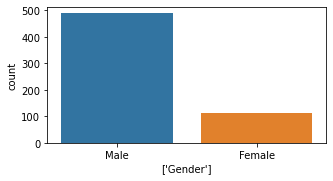

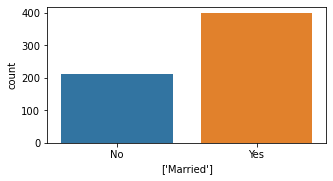

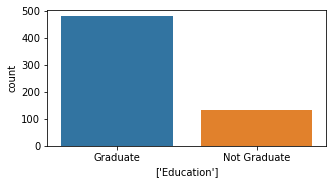

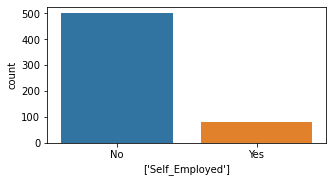

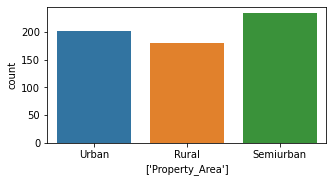

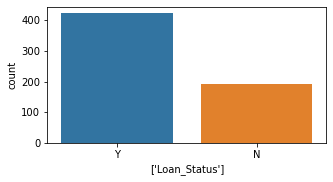

In [13]:
for d in Training_data.columns:
    if Type[d]=="object":
        plt.figure(figsize=(5,2.5))
        sns.countplot(Training_data[d])
        plt.xlabel([d])

### Observation:-
- Semiurban has the most property area from the given data.
- The contribution of men is higher than the female.Likewise, married person has the highest contribution than unmarried. 

### 5.2 Bivariant Analysis
- Bivariant Analysis contain a indepented variable more than one.

<AxesSubplot:>

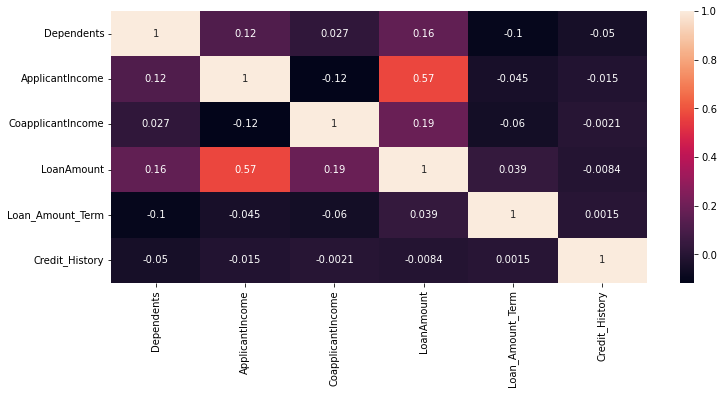

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(Training_data.corr(),annot=True)

### Observation:-
- Above diagram show the correlated relationship of the trained data. 

# 6) Data preprocessing:-
**Encoding Categorical Features:**
Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

In [15]:
Type=Training_data.dtypes
Type

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
gm=["Gender","Married","Education","Self_Employed","Property_Area"]

In [17]:
for i in gm:
    Training_data[i]=Label.fit_transform(Training_data[i])
              

In [18]:
Training_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [19]:
Training_data.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
dtype: object

### Observation:-
- Every categorical variable converted into Numerical variable by using label encoding.

# 7) Data wrangling
In this section, we will clean out our data based on the information retrieved from the previous observations.

Hence, we will have to perform the following subtasks

- Checking for missing values and manipulating them

- Checking the datatypes

- Checking of the Spelling Correction

In [20]:
g=Training_data.isnull().sum()
g

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
fill=["Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
for t in fill:
    Training_data[t].fillna(Training_data[t].mean(),inplace=True)

In [22]:
Training_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [23]:
Training_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 8) Separating Train and Test data
The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. **This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.**

In [24]:
# Train data has been separated  X and Y for prediction

X=Training_data.drop(["Loan_Status"],axis=1)
Y=Training_data["Loan_Status"]

In [25]:
# import libary for Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=45)

In [26]:
X_train.shape,X_test.shape,Y_train.shape,y_test.shape

((460, 11), (154, 11), (460,), (154,))

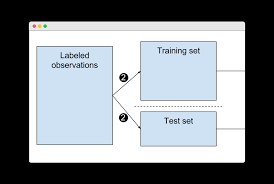

# 9)  Modeling the Train_data :-
### Define a baseline model
A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models. Baseline models usually lack complexity and may have little predictive power.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
Classi=[KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(),SVC(),LogisticRegression()]
Overall_models_performance=[]

for u in Classi:
# Importing the model name
    Model_name=type(u).__name__

# Fitting the model into train data
    u.fit(X_train,Y_train)
    
# Predicting the train data by using model
    Y_pred_train=u.predict(X_train)
    
# Predicting the test data by using model
    Y_pred_test=u.predict(X_test)
    
# Calculating train accuracy
    Train_data_score=u.score(X_train,Y_train)
    
# Caculating test accuracy
    Test_data_score=u.score(X_test,y_test)
    

    
    
    print("Model Name : ",Model_name)
    
    print("Train data Score :",Train_data_score)
    
    print("Test data Score :", Test_data_score)

Model Name :  KNeighborsClassifier
Train data Score : 0.7652173913043478
Test data Score : 0.5974025974025974
Model Name :  RandomForestClassifier
Train data Score : 1.0
Test data Score : 0.7532467532467533
Model Name :  SVC
Train data Score : 0.7065217391304348
Test data Score : 0.6493506493506493
Model Name :  LogisticRegression
Train data Score : 0.8217391304347826
Test data Score : 0.7792207792207793


### Observation:-
- **Logistic Regression** is the best accuracy scorer among the models.It has 82% of accuracy in train data and 77% of accuracy in test data.
- RandomforestClassifier gives the best accuracy score and **Low Basis and low variance (low overfitting)** among the models.So the RandomForestClassifier is used for the **Hyperparameter tuning**.
- KneighborsClassifier and RandomForest classifier has the **Low Basis and High variance(Overfitting)**.

## Find out the test data is balanced or Unbalanced?

In [29]:
y_test.value_counts()

Y    100
N     54
Name: Loan_Status, dtype: int64

### Observation:-
- From thr above value_counts statement,65% data lies on the "YES" and 35% of the lies on the "NO".
- So the data consider as a **Unbalanced data**.
- So thr confusion Matrix,Precision and Recall classifier are used to find the accuracy.

### 1) Confusion Matrix:
It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [52]:
# Create a Logistic Regression model
LogR=LogisticRegression(C=100, solver='liblinear', random_state=0)

# fitting the train dataset
LogR.fit(X_train,Y_train)

# Predict the test data 
y_pre_test=LogR.predict(X_test)

# Predict the train data
y_pre_train=LogR.predict(X_train)

# Perform the confusion matrix of the test data
cm=confusion_matrix(y_pre_test,y_test)

# Perform the confusion matrix of the train data
cmt=confusion_matrix(y_pre_train,Y_train)

print("Perform the confusion matrix of the test data :",cm)

print("Perform the confusion matrix of the train data ;",cmt)

Perform the confusion matrix of the test data : [[ 20   0]
 [ 34 100]]
Perform the confusion matrix of the train data ; [[ 64   8]
 [ 74 314]]


### Observation:
- **Actual positive/Predicted Positive** of the predicted test data 20 out of 54.
- **Actual Negative/Predicted Negative** of the predicted test data 100 out of 100

In [31]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

cm_matrix

,Actual Positive:1,Actual Negative:0
Predict Positive:1,20,0
Predict Negative:0,34,100


<AxesSubplot:>

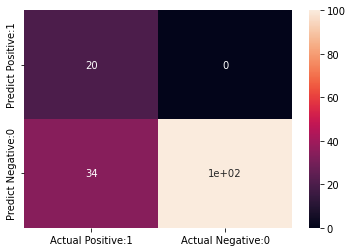

In [32]:
sns.heatmap(cm_matrix,annot=True)

### 2) Precision
 **Precision** identifies the proportion of **correctly predicted positive outcome**. It is more concerned with the positive class than the negative class.


In [33]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [34]:
precision = TP / float(TP + FP)

print("Precision_score : {0:0.2f}".format(precision))

Precision_score : 1.00


### 3) Recall
**Recall** can be defined as **the percentage of correctly predicted positive outcomes out of all the actual positive outcomes**.
Recall is also called **Sensitivity**.

In [35]:
recall = TP / float(TP + FN)

print("Recall_score : {0:0.2f}".format(recall))

Recall_score : 0.37


## Hyperparameters Tuning:
Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning and also used to find out the best model.

- We will be using GridSearchCV in order to find the best values.

- We will consider LogisticRegression as they have given best results

In [36]:
param_grid = {'penalty':['l1','l2'], 
              'C':[1, 10, 100, 1000]}

In [37]:

model=GridSearchCV(estimator =LogR, param_grid = param_grid,scoring = 'accuracy',cv = 5,verbose=0)

model.fit(X_train,Y_train)



GridSearchCV(cv=5,
             estimator=LogisticRegression(C=100, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [38]:
Y_pred=model.predict(X_test)

In [39]:

# Printing metrics
print("[Hyperparameters]:", model.best_params_)
print("[Train Score]:",model.best_score_)
print("[Validation train Score]:", model.score(X_train,
                                      Y_train))
print("[Validation test Score]:", model.score(X_test,
                                      y_test))

[Hyperparameters]: {'C': 10, 'penalty': 'l1'}
[Train Score]: 0.8195652173913045
[Validation train Score]: 0.8260869565217391
[Validation test Score]: 0.7792207792207793


### Observation:
After **Hyperparameters tunnig** the model score has been changed slightly from **82.1% to 82.6%**,so this model is best for predicting the unseen data.

# 10) Test data:-


In [40]:
# Best model for test data
Model=model.best_estimator_

In [41]:
# Drop the Loan_ID feature from test data
test_datas.drop(["Loan_ID"],inplace=True,axis=1)



# Label Encoder for Categorical variables in Test data 
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
gm=["Gender","Married","Education","Self_Employed","Property_Area"]
for i in gm:
    test_datas[i]=Label.fit_transform(test_datas[i])
    
    
    
    
# Fill the missing value in Test data   
fill=["Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
for t in fill:
    test_datas[t].fillna(test_datas[t].mean(),inplace=True)



# 11) Submission file:-

In [42]:

# Implementing the best Model
Model.fit(X_train,Y_train)

LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear')

In [43]:
# Predictind the final test data by best model
Y_pred_final_test=Model.predict(test_datas)

In [45]:
Submission_file=pd.DataFrame({"Loan_ID":Final_datas["Loan_ID"],"Loan_Status":Y_pred_final_test})

In [46]:
Submission_file

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [53]:
Submission_file.to_csv("Submission_files19.csv")

# Conclusion:-
From the above problem statement the given test data has been predicted by using **logistic Regression** model. The hyperparameter tuning od GridSearchCV has been used to provide a best model.
